In [2]:
import pandas as pd


In [3]:
import numpy as np


In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:

X=df.drop("Outcome",axis=1)
Y=df["Outcome"]

In [13]:
X_train,X_test,Y_test,Y_train=train_test_split(X,Y,random_state=0,test_size=0.2)

In [14]:
X_train.shape

(614, 8)

In [15]:
X_test.shape

(154, 8)

In [16]:
scaler=StandardScaler()

In [17]:
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [18]:
print(X_train)
print(X_test)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
[[-0.84488505  2.44447821  0.35643175 ...  1.38436175  2.784923
  -0.95646168]
 [-0.54791859 -0.43485916  0.25303625 ...  0.20401277 -0.20499449
  -0.87137393]
 [ 0.04601433 -1.40507067 -0.36733675 ...  0.25478047 -0.24425603
  -0.70119842]
 ...
 [ 0.04601433  0.66054092  0.87340925 ...  1.52397292  0.52285411
  -0.95646168]
 [-0.25095213 -0.15318486  0.25303625 ... -0.72249772 -1.10196973
  -0.78628618]
 [-0.84488505 -0.43485916  0.14964075 ... -0.15136112  1.054395
  -0.78628618]]


In [19]:
from sklearn import svm

In [20]:
classifier=svm.SVC(kernel="linear")

In [21]:
classifier.fit(X_train,Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [768, 154]

error occur due to scale first then split or # after scaling Y_train = Y_test
or  # X_train = scaler.fit_transform(X)


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(768, 8)
(614,)
(154, 8)
(154,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    stratify=Y,
    random_state=2
)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(614, 8)
(614,)
(154, 8)
(154,)


In [ ]:
assert X_train.shape[0] == Y_train.shape[0]


In [ ]:
X_train_prediction = classifier.predict(X_train)

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("Training Accuracy:", training_data_accuracy)


Training Accuracy: 0.7866449511400652


In [ ]:
X_test_prediction = classifier.predict(X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Test Accuracy:", test_data_accuracy)


Test Accuracy: 0.7727272727272727


TESTING INPUT DATA

In [ ]:
input= (5,166,72,19,175,25.8,0.587,51)


In [ ]:
input_array=np.asarray(input)

In [ ]:
input_array_reshape=input_array.reshape(1,-1)

Reshape because Model expects 2D input

In [ ]:
input_standarlized=scaler.transform(input_array_reshape)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction = classifier.predict(input_standarlized)

print(prediction)


[1]


In [ ]:
if prediction[0] == 0:
    print("Person is Not Diabetic")
else:
    print("Person is Diabetic")


Person is Diabetic


In [ ]:
from sklearn.decomposition import PCA

# Use all 8 features
X = df.drop(columns='Outcome')
Y = df['Outcome']

# Scale first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (8D → 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_pca, Y, test_size=0.2, stratify=Y, random_state=2
)

# Train Logistic
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


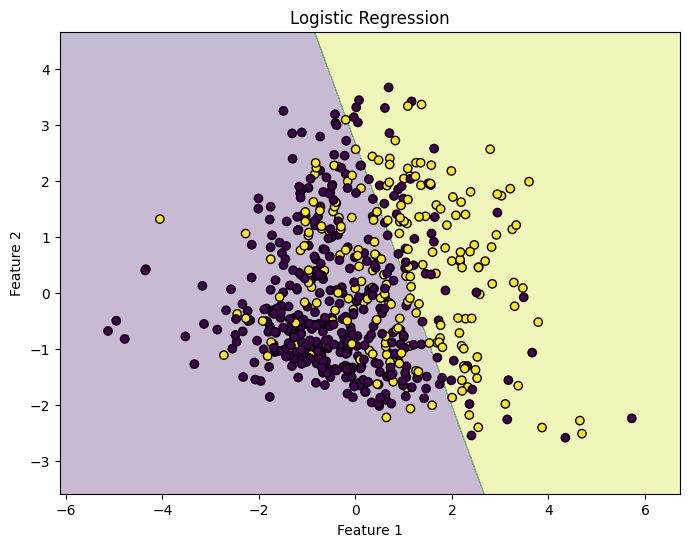

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):

    X = np.array(X)
    y = np.array(y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

plot_decision_boundary(classifier, X_train, Y_train,
                       "Logistic Regression")